In [1]:
import numpy as np
from numpy.random import default_rng
from numpy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

In [2]:
N = 2048
x = (2*np.pi*np.arange(1,N+1)/N)
rng = default_rng(0)
u = rng.standard_normal(N).astype('float128')
v = fft(u)
nu = 0.05

# spatial grid and initial conditions
h = 0.01
k = (np.r_[np.arange(0, N/2), np.array([0]), np.arange(-N/2+1, 0)]/16).astype('float128')
L = k**2 - nu*k**4
exp1 = np.exp(h*L)
exp2 = np.exp(h*L/2)
M = 16
r = np.exp(1j*np.pi*(np.arange(1, M+1)-0.5) / M)
LR = h*np.repeat([L], M, axis=0).T + np.repeat([r], N, axis=0)
Q = h*np.real(np.mean((np.exp(LR/2)-1)/LR, axis=1))
f1 = h*np.real(np.mean((-4-LR+np.exp(LR)*(4-3*LR+LR**2))/LR**3, axis=1))
f2 = h*np.real(np.mean((2+LR+np.exp(LR)*(-2+LR))/LR**3, axis=1))
f3 = h*np.real(np.mean((-4-3*LR-LR**2+np.exp(LR)*(4-LR))/LR**3, axis=1))

tmax = 10
step_max = round(tmax/h)
step_plt = int(tmax/(1000*h))
g = -0.5j*k
# tt = np.zeros(step_max)
# uu = np.zeros((N,step_max))
uu = np.array([u])
tt = 0

for step in range(1, step_max):
    t = step*h
    Nv = g*fft(np.real(ifft(v))**2)
    a = exp2*v + Q*Nv
    Na = g*fft(np.real(ifft(a))**2)
    b = exp2*v + Q*Na
    Nb = g*fft(np.real(ifft(b))**2)
    c = exp2*a + Q*(2*Nb - Nv)
    Nc = g*fft(np.real(ifft(c))**2)
    v = exp1*v + Nv*f1 + 2*(Na+Nb)*f2 + Nc*f3
    if step % step_plt == 0:
        u = np.real(ifft(v))
        uu = np.append(uu, np.array([u]), axis=0)
        tt = np.hstack((tt, t))
        # uu[:,step] = u
        # tt[step] = t

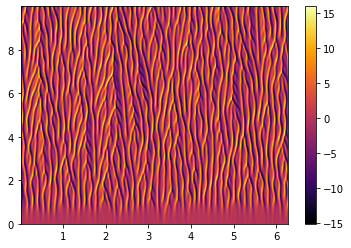

In [3]:
fig, ax = plt.subplots(1,1)
X, T = np.meshgrid(x, tt)
im = ax.pcolormesh(X, T, uu, cmap='inferno', rasterized=True)
fig.colorbar(im)
plt.show()